In [ ]:
!pip install biopython --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 31.9 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


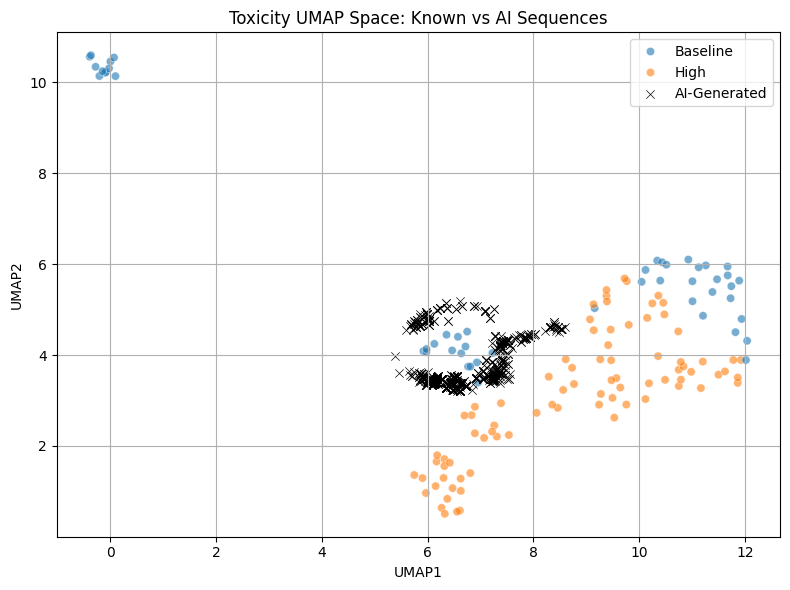

In [ ]:
# 📌 Reproducible Pipeline: Red Teaming AI-Generated Proteins

# ✅ STEP 0: Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import random
import itertools

# ✅ STEP 1: Load Toxin Dataset and Clean
df_toxins = pd.read_csv("/content/t3db_protparam_only.csv")
numeric_cols = ['MolecularWeight', 'IsoelectricPoint', 'Aromaticity', 'InstabilityIndex', 'GRAVY', 'Length']
df_toxins_clean = df_toxins.dropna(subset=numeric_cols).reset_index(drop=True)

# ✅ STEP 2: Normalize Features
scaler = StandardScaler()
X_toxins = scaler.fit_transform(df_toxins_clean[numeric_cols])

# ✅ STEP 3: PCA + UMAP Projection
pca = PCA(n_components=2)
df_toxins_clean[['PC1', 'PC2']] = pca.fit_transform(X_toxins)

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
df_toxins_clean[['UMAP1', 'UMAP2']] = umap_model.fit_transform(X_toxins)

# ✅ STEP 4: Clustering & Outlier Detection
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_toxins_clean['Cluster'] = kmeans.fit_predict(X_toxins)
df_toxins_clean['RiskLabel'] = df_toxins_clean['Cluster'].apply(lambda x: 'High' if x == 2 else 'Baseline')

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_toxins_clean['IForest_Outlier'] = iso_forest.fit_predict(X_toxins)

oc_svm = OneClassSVM(gamma='auto', nu=0.05)
df_toxins_clean['OCSVM_Outlier'] = oc_svm.fit_predict(X_toxins)

# ✅ STEP 5: Export Toxin Map
df_toxins_clean.to_csv("/content/toxins_with_risk_map.csv", index=False)

# ✅ STEP 6: Generate Synthetic Peptides (Scrambled Oxytocin)
def analyze_sequence(seq):
    a = ProteinAnalysis(seq)
    return {
        "Sequence": seq,
        "MolecularWeight": a.molecular_weight(),
        "IsoelectricPoint": a.isoelectric_point(),
        "Aromaticity": a.aromaticity(),
        "InstabilityIndex": a.instability_index(),
        "GRAVY": a.gravy(),
        "Length": len(seq)
    }

random.seed(42)
original_seq = "CYIQNCPLG"
perms = list(set([''.join(p) for p in itertools.permutations(original_seq)]))
sampled = random.sample(perms, 1000)
scrambled_df = pd.DataFrame([analyze_sequence(s) for s in sampled])
scrambled_df.to_csv("/content/oxytocin_scrambled_analysis.csv", index=False)

# ✅ STEP 7: Project AI-Generated Peptides
X_gen = scaler.transform(scrambled_df[numeric_cols])
scrambled_df[['PC1', 'PC2']] = pca.transform(X_gen)
scrambled_df[['UMAP1', 'UMAP2']] = umap_model.transform(X_gen)
scrambled_df['RiskCluster'] = kmeans.predict(X_gen)
scrambled_df['OCSVM_Outlier'] = oc_svm.predict(X_gen)
scrambled_df['IForest_Outlier'] = iso_forest.predict(X_gen)
scrambled_df.to_csv("/content/ai_protein_risk_report.csv", index=False)

# ✅ STEP 8: Optional Pairwise Similarity (Need FASTA/seq inputs)
# Placeholder for external similarity tool like BLAST or custom alignment

# ✅ STEP 9: Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_toxins_clean, x='UMAP1', y='UMAP2', hue='RiskLabel', alpha=0.6)
sns.scatterplot(data=scrambled_df, x='UMAP1', y='UMAP2', color='black', marker='x', label='AI-Generated')
plt.title("Toxicity UMAP Space: Known vs AI Sequences")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 📥 Load the annotated AI peptide risk report
df_ai = pd.read_csv('/content/ai_protein_risk_report.csv')

# ✅ Define High-Risk Criteria
high_risk_mask = (
    (df_ai['RiskCluster'] == 2) |
    (df_ai['OCSVM_Outlier'] == -1) |
    (df_ai['IForest_Outlier'] == -1)
)

# 🎯 Filter high-risk peptides
df_high_risk = df_ai[high_risk_mask].copy()

# 💾 Save high-risk set to CSV
df_high_risk.to_csv('/content/high_risk_ai_set.csv', index=False)

print(f"✅ Exported {len(df_high_risk)} high-risk peptides to high_risk_ai_set.csv")


✅ Exported 548 high-risk peptides to high_risk_ai_set.csv


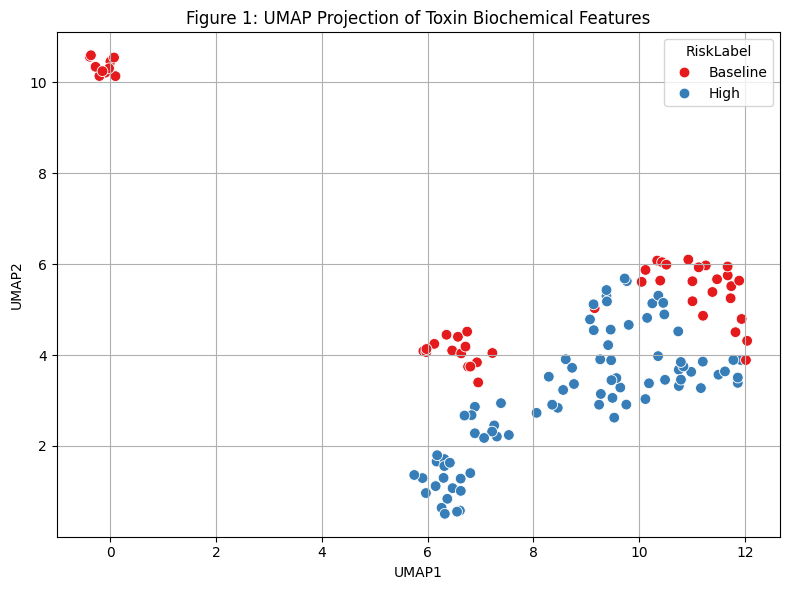

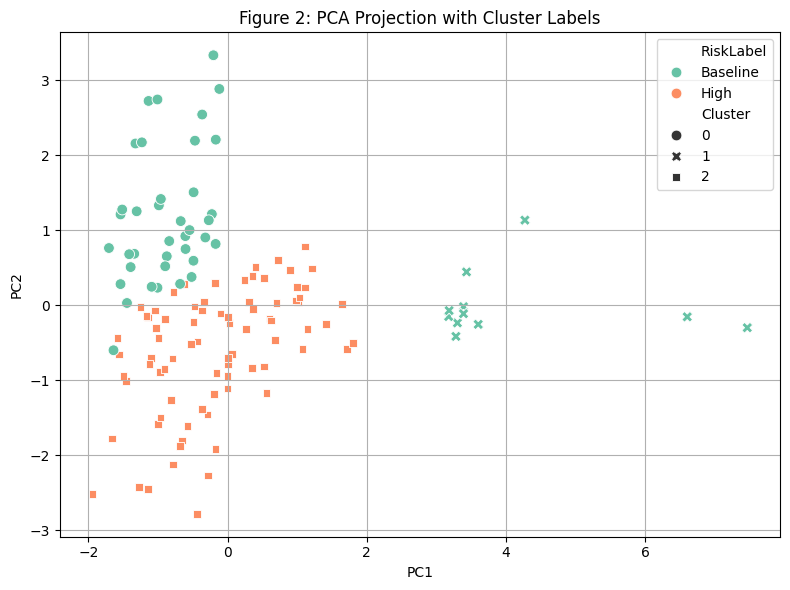

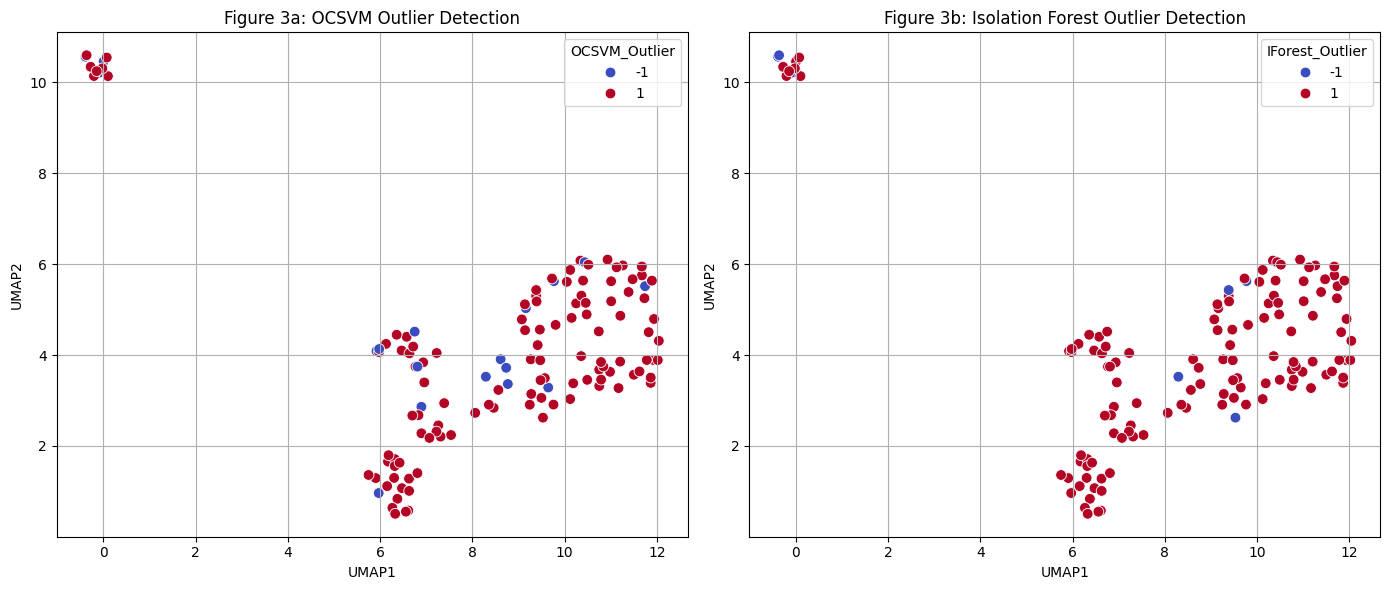

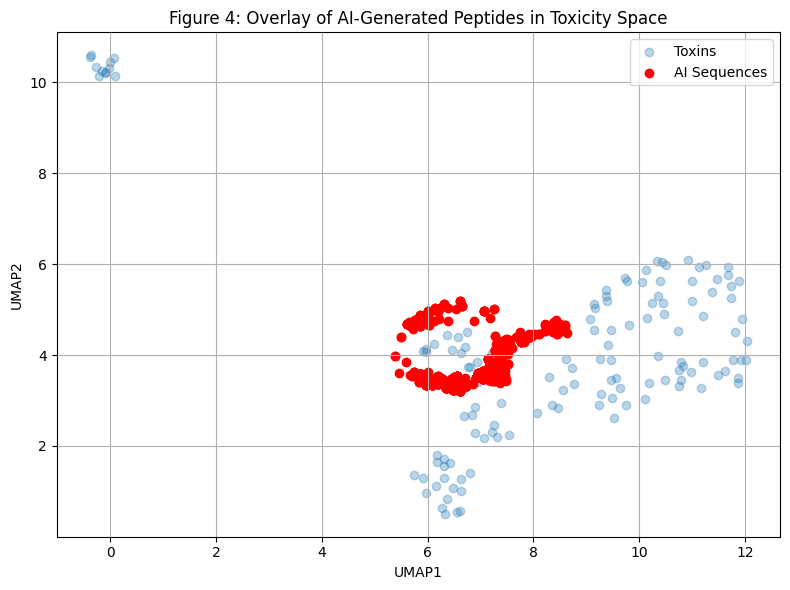

FileNotFoundError: [Errno 2] No such file or directory: '/content/high_risk_vs_toxins_similarity.csv'

In [ ]:
# 📊 Toxicity Embedding Space - UMAP (Figure 1)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_toxins_clean, x='UMAP1', y='UMAP2', hue='RiskLabel', palette='Set1', s=60)
plt.title("Figure 1: UMAP Projection of Toxin Biochemical Features")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 PCA Clustering (Figure 2)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_toxins_clean, x='PC1', y='PC2', hue='RiskLabel', style='Cluster', palette='Set2', s=60)
plt.title("Figure 2: PCA Projection with Cluster Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Outlier Detection (Figure 3)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(data=df_toxins_clean, x='UMAP1', y='UMAP2', hue='OCSVM_Outlier', ax=axes[0], palette='coolwarm', s=60)
axes[0].set_title("Figure 3a: OCSVM Outlier Detection")
axes[0].grid(True)
sns.scatterplot(data=df_toxins_clean, x='UMAP1', y='UMAP2', hue='IForest_Outlier', ax=axes[1], palette='coolwarm', s=60)
axes[1].set_title("Figure 3b: Isolation Forest Outlier Detection")
axes[1].grid(True)
plt.tight_layout()
plt.show()

# 📊 AI Proteins vs Toxins Overlay (Figure 4)
df_ai = pd.read_csv("/content/ai_protein_risk_report.csv")
plt.figure(figsize=(8, 6))
plt.scatter(df_toxins_clean['UMAP1'], df_toxins_clean['UMAP2'], alpha=0.3, label='Toxins')
plt.scatter(df_ai['UMAP1'], df_ai['UMAP2'], color='red', label='AI Sequences')
plt.title("Figure 4: Overlay of AI-Generated Peptides in Toxicity Space")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Similarity Heatmap (Figure 5)
sim_df = pd.read_csv("/content/high_risk_vs_toxins_similarity.csv")
sim_matrix = sim_df.pivot(index='AI_Name', columns='Toxin_Name', values='Similarity')
plt.figure(figsize=(12, 6))
sns.heatmap(sim_matrix, cmap='YlGnBu', linewidths=0.5)
plt.title("Figure 5: Pairwise Sequence Similarity Heatmap")
plt.tight_layout()
plt.show()


In [ ]:
# 📦 Required Libraries
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# ✅ Step 1: Load Generated Peptide File
gen_df = pd.read_csv("oxytocin_scrambled_analysis.csv")

# ✅ Step 2: Clean & Extract Sequences
gen_df['Sequence'] = gen_df['Sequence'].astype(str).str.strip()
sequences = gen_df['Sequence'].dropna().tolist()

# ✅ Step 3: ProtParam Feature Extraction Function
def compute_protparam_metrics(sequence):
    try:
        if not sequence or len(sequence) < 2:
            return {
                "MolecularWeight": None,
                "Aromaticity": None,
                "InstabilityIndex": None,
                "IsoelectricPoint": None,
                "GRAVY": None,
                "Length": len(sequence) if sequence else 0
            }

        analysis = ProteinAnalysis(sequence)
        return {
            "MolecularWeight": analysis.molecular_weight(),
            "Aromaticity": analysis.aromaticity(),
            "InstabilityIndex": analysis.instability_index(),
            "IsoelectricPoint": analysis.isoelectric_point(),
            "GRAVY": analysis.gravy(),
            "Length": len(sequence)
        }
    except Exception as e:
        print(f"⚠️ Error with sequence: {sequence[:10]}... | {e}")
        return {
            "MolecularWeight": None,
            "Aromaticity": None,
            "InstabilityIndex": None,
            "IsoelectricPoint": None,
            "GRAVY": None,
            "Length": None
        }

# ✅ Step 4: Compute Features
metrics = [compute_protparam_metrics(seq) for seq in sequences]
gen_features_df = pd.DataFrame(metrics)
gen_features_df['Sequence'] = sequences  # Add sequence column back

# ✅ Step 5: Preview Result
display(gen_features_df.head())


,MolecularWeight,Aromaticity,InstabilityIndex,IsoelectricPoint,GRAVY,Length,Sequence
0,1010.1878,0.111111,79.111111,5.510734,0.333333,9,QNICYLCPG
1,1010.1878,0.111111,-5.333333,5.510734,0.333333,9,CYGINLPCQ
2,1010.1878,0.111111,30.288889,5.869217,0.333333,9,PYQGCCILN
3,1010.1878,0.111111,92.133333,5.510734,0.333333,9,QYNICLGCP
4,1010.1878,0.111111,81.455556,5.510734,0.333333,9,LQCGNIYPC


In [ ]:
# ✅ Step: Save as CSV
gen_features_df.to_csv("generated_peptides_with_protparam.csv", index=False)

# 📎 Optional confirmation
print("✅ Exported to: generated_peptides_with_protparam.csv")


✅ Exported to: generated_peptides_with_protparam.csv
